# Implementation of kmodes clustering for segmentation of galactagogues (food items and supplements).

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from kmodes.kmodes import KModes
import plotnine
from plotnine import ggplot, geom_line, geom_point, geom_label, aes, labs, xlab, ylab, theme_minimal
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
# Use the theme of ggplot
plt.style.use('ggplot')

In [4]:
questionaire_df = pd.read_csv('/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Galactagogue_buying_patterns/data/Ryan_DataforRay_MissingReplaced_2022.09.30.csv')
questionaire_df.head(10)

,ID,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,...,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,3,3,3,3,3,3,...,2,1,2,2,1,2,2,2,2,2
1,2,1,2,2,3,3,1,3,3,3,...,2,2,2,2,2,2,2,2,1,2
2,3,1,1,2,2,1,1,1,1,1,...,2,1,2,2,2,3,2,1,1,2
3,4,2,2,2,3,3,3,3,3,3,...,2,1,2,2,2,2,2,2,2,2
4,5,1,1,2,2,1,1,3,2,2,...,2,1,1,1,1,2,2,2,1,2
5,6,2,2,2,3,3,3,3,3,3,...,2,1,1,2,2,2,2,1,2,2
6,7,1,2,2,3,2,2,2,3,1,...,2,1,2,2,2,1,2,1,2,2
7,8,1,2,2,1,-99,-99,-99,-99,1,...,2,1,2,2,1,-99,2,2,1,1
8,9,2,2,2,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
9,10,2,2,2,3,3,3,3,3,3,...,2,1,2,2,2,2,2,2,2,2


In [5]:
questionaire_df=questionaire_df.replace(-99,np.nan).dropna(axis = 0, how = 'any')

In [6]:
columns = ['oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat', 'ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle', 'domperidone', 'metaclopramide',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress']
questionaire_df = pd.DataFrame(data = questionaire_df, columns = columns)

In [7]:
questionaire_df = questionaire_df.replace({3: 2,1: 1, 2: 2}, regex = True)

Checking the column data types

In [8]:
questionaire_df.dtypes

oats               float64
lacttreathome      float64
lacttreatstore     float64
brewersyeast       float64
coconutdrink       float64
sportdrink         float64
pinkdrink          float64
noalcbeer          float64
beer               float64
wine               float64
lacttea            float64
fruit              float64
veg                float64
seeds              float64
beans              float64
wholegrains        float64
nuts               float64
meat               float64
ComboSupp            int64
fenugreek          float64
thistel            float64
shatavari          float64
goatrue            float64
moringa            float64
alfalfa            float64
fennel             float64
milkthistle          int64
nettle             float64
domperidone          int64
metaclopramide       int64
increasebf         float64
increaseexpress      int64
skintoskin           int64
shield               int64
massage            float64
pumpwhilebf        float64
pumpboth             int64
p

Since the k-modes clustering algorithm needs categorical data, so the data type of the columns need to be changed to "category".

In [9]:
column_list = questionaire_df.columns
for col in column_list:
    questionaire_df[col] = questionaire_df[col].astype('category')

Checking the unique values of each categorical column

In [10]:
questionaire_df.select_dtypes('category').nunique()


oats               2
lacttreathome      2
lacttreatstore     2
brewersyeast       2
coconutdrink       2
sportdrink         2
pinkdrink          2
noalcbeer          2
beer               2
wine               2
lacttea            2
fruit              2
veg                2
seeds              2
beans              2
wholegrains        2
nuts               2
meat               2
ComboSupp          2
fenugreek          2
thistel            2
shatavari          1
goatrue            2
moringa            2
alfalfa            2
fennel             2
milkthistle        2
nettle             2
domperidone        2
metaclopramide     2
increasebf         2
increaseexpress    2
skintoskin         2
shield             2
massage            2
pumpwhilebf        2
pumpboth           2
pumpafter          2
warmed             2
reducestress       2
dtype: int64

In [11]:
# We keep a copy of the original data
questionaire_df_copy = questionaire_df.copy()

__Choosing the optimal number of clusters__

In [12]:
cost = []
for cluster in range(1, 21):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        fitClusters = kmodes.fit_predict(questionaire_df)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19
Cluster initiation: 20


Converting the results into a dataframe and plotting them

In [13]:
df_cost = pd.DataFrame({'Cluster': range(1, 21), 'Cost': cost})

In [14]:
df_cost

,Cluster,Cost
0,1,5174.0
1,2,4145.0
2,3,3770.0
3,4,3644.0
4,5,3396.0
5,6,3312.0
6,7,3273.0
7,8,3140.0
8,9,3064.0
9,10,3003.0


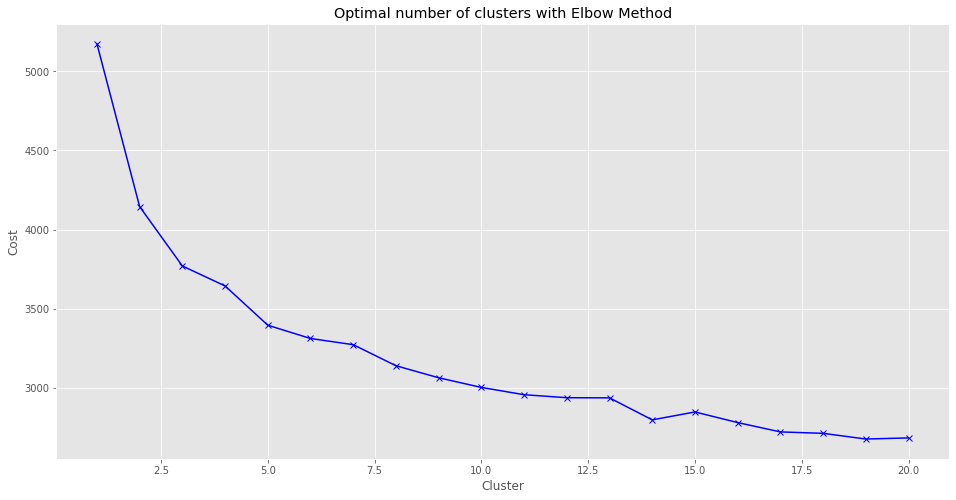

In [15]:
plt.figure(figsize=(16,8))
plt.plot(df_cost['Cluster'], df_cost['Cost'], 'bx-')
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.title('Optimal number of clusters with Elbow Method')
plt.show()

Calculating Silhouette Scores for the clusters

In [183]:
cost = []
for cluster in range(2, 21):
    try:
        kmodes = KModes(n_clusters = cluster, init = 'Huang', random_state = 0)
        fitClusters = kmodes.fit_predict(questionaire_df)
        cost.append(kmodes.cost_)
        silhouette_avg = silhouette_score(questionaire_df, fitClusters)
        print("For n_clusters =", cluster,"The average silhouette_score is :",silhouette_avg)
    except:
        break


For n_clusters = 2 The average silhouette_score is : 0.012019400666472446
For n_clusters = 3 The average silhouette_score is : -0.010043833640400728
For n_clusters = 4 The average silhouette_score is : -0.08401387535522312
For n_clusters = 5 The average silhouette_score is : -0.11028477994796503
For n_clusters = 6 The average silhouette_score is : -0.092770105930467
For n_clusters = 7 The average silhouette_score is : -0.13835057854624724
For n_clusters = 8 The average silhouette_score is : -0.1543431981228373
For n_clusters = 9 The average silhouette_score is : -0.17692798014622577
For n_clusters = 10 The average silhouette_score is : -0.16991961624925667
For n_clusters = 11 The average silhouette_score is : -0.1551888052938618
For n_clusters = 12 The average silhouette_score is : -0.19266988485013878
For n_clusters = 13 The average silhouette_score is : -0.21996857548467305
For n_clusters = 14 The average silhouette_score is : -0.1734548717726208
For n_clusters = 15 The average silho

Looking at the scores, we find that most of them are less than zero. Since the range of silhouette score is from -1 to 1, so the scores of the clusters are within the permissible range. For n_clusters = 6, the silhouette score is -0.09

According to the scree plot, we get the optimal number of cluster k=10. So, we consider choosing k=10 for the cluster analysis.

In [173]:
# Fit the cluster
clusters = 10
kmodes = KModes(n_jobs = -1, n_clusters = clusters, init = 'Huang', random_state = 0)
fitClusters = kmodes.fit_predict(questionaire_df)

In [31]:
clusterCentroidsDf = pd.DataFrame(kmodes.cluster_centroids_)
clusterCentroidsDf.columns = questionaire_df.columns
clusterCentroidsDf

,index,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,...,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress
0,10.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
1,35.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0
2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0
4,26.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
5,150.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0
6,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,51.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
8,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
9,154.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0


Combining the predicted clusters with the original dataframe

In [32]:
questionaire_df = questionaire_df_copy.reset_index()

In [33]:
clustersDf = pd.DataFrame(fitClusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([questionaire_df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [20]:
combinedDf.head(10)

,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,...,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,cluster_predicted
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1,2,2,2.0,2.0,2,2,2,2,1
1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,2,2,2.0,2.0,2,2,2,2,1
2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2,1,2,1.0,2.0,2,1,2,1,3
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1,1,1,1.0,1.0,1,1,1,1,2
4,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,2,2,2.0,2.0,2,2,2,2,6
5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,2,2,2.0,2.0,2,2,2,2,1
6,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2,1,2,2.0,2.0,2,2,2,1,0
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,2,2,2.0,2.0,2,2,2,1,1
8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,2,2,2.0,2.0,2,2,2,2,1
9,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,2,2,2.0,2.0,1,2,2,2,1


Cluster identification

In [47]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]
cluster_6 = combinedDf[combinedDf['cluster_predicted'] == 6]
cluster_7 = combinedDf[combinedDf['cluster_predicted'] == 7]
cluster_8 = combinedDf[combinedDf['cluster_predicted'] == 8]
cluster_9 = combinedDf[combinedDf['cluster_predicted'] == 9]


In [126]:
for i in range(0, 10):
    print("Cluster Number "+ str(i) + " and its length:- "+str(len(combinedDf[combinedDf['cluster_predicted'] == i])))

Cluster Number 0 and its length:- 154
Cluster Number 1 and its length:- 101
Cluster Number 2 and its length:- 473
Cluster Number 3 and its length:- 114
Cluster Number 4 and its length:- 53
Cluster Number 5 and its length:- 56
Cluster Number 6 and its length:- 127
Cluster Number 7 and its length:- 62
Cluster Number 8 and its length:- 55
Cluster Number 9 and its length:- 12


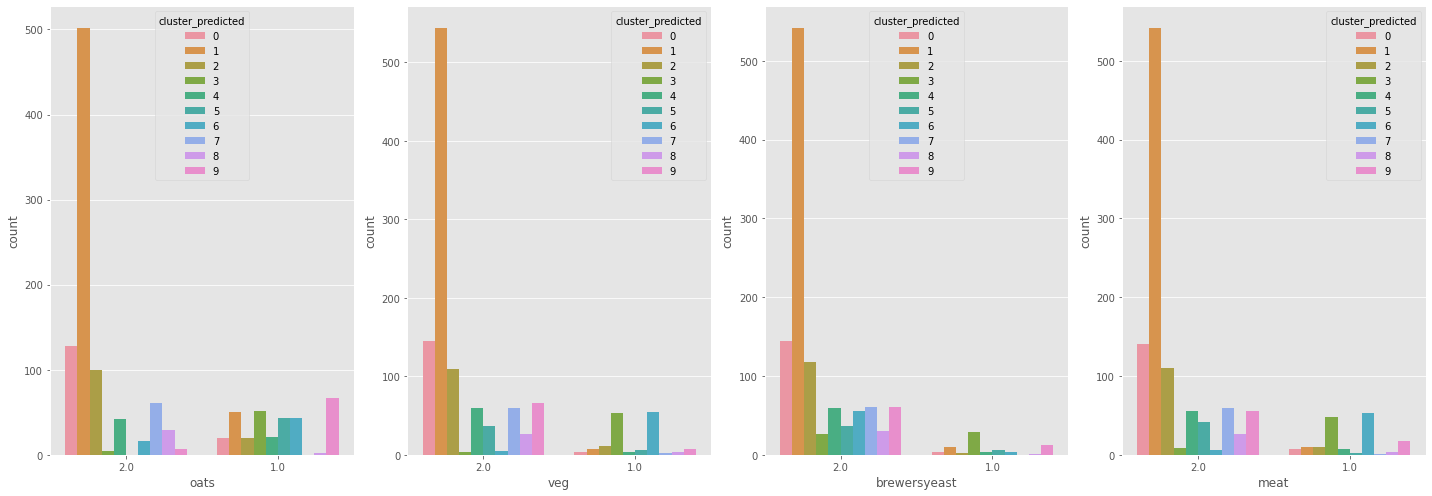

In [28]:
f, axs = plt.subplots(1,4,figsize = (20,7))
sns.countplot(x=combinedDf['oats'],order=combinedDf['oats'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['veg'],order=combinedDf['veg'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['brewersyeast'],order=combinedDf['brewersyeast'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])
sns.countplot(x=combinedDf['meat'],order=combinedDf['meat'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[3])
plt.tight_layout()
plt.show()

In [184]:
for i in range(0,10):
    globals()[f"cluster_{i}"] = combinedDf[combinedDf['cluster_predicted'] == i]
    globals()[f"cluster{i}"] = globals()[f"cluster_{i}"].isin([1]).sum(axis=0)
    globals()[f"cluster{i}"] = pd.DataFrame(globals()[f"cluster{i}"])
    globals()[f"cluster{i}"]['galactagogue'] = globals()[f"cluster{i}"].index
    globals()[f"cluster{i}"] = globals()[f"cluster{i}"].rename(columns ={0:'count'})
    globals()[f"cluster{i}"].reset_index(drop=True, inplace=True)
    globals()[f"cluster{i}"] = globals()[f"cluster{i}"].sort_values('count', ascending=False)
    globals()[f"cluster{i}"] = globals()[f"cluster{i}"].loc[globals()[f"cluster{i}"]["galactagogue"] != "cluster_predicted"]


__Visualizing the contents of various clusters__

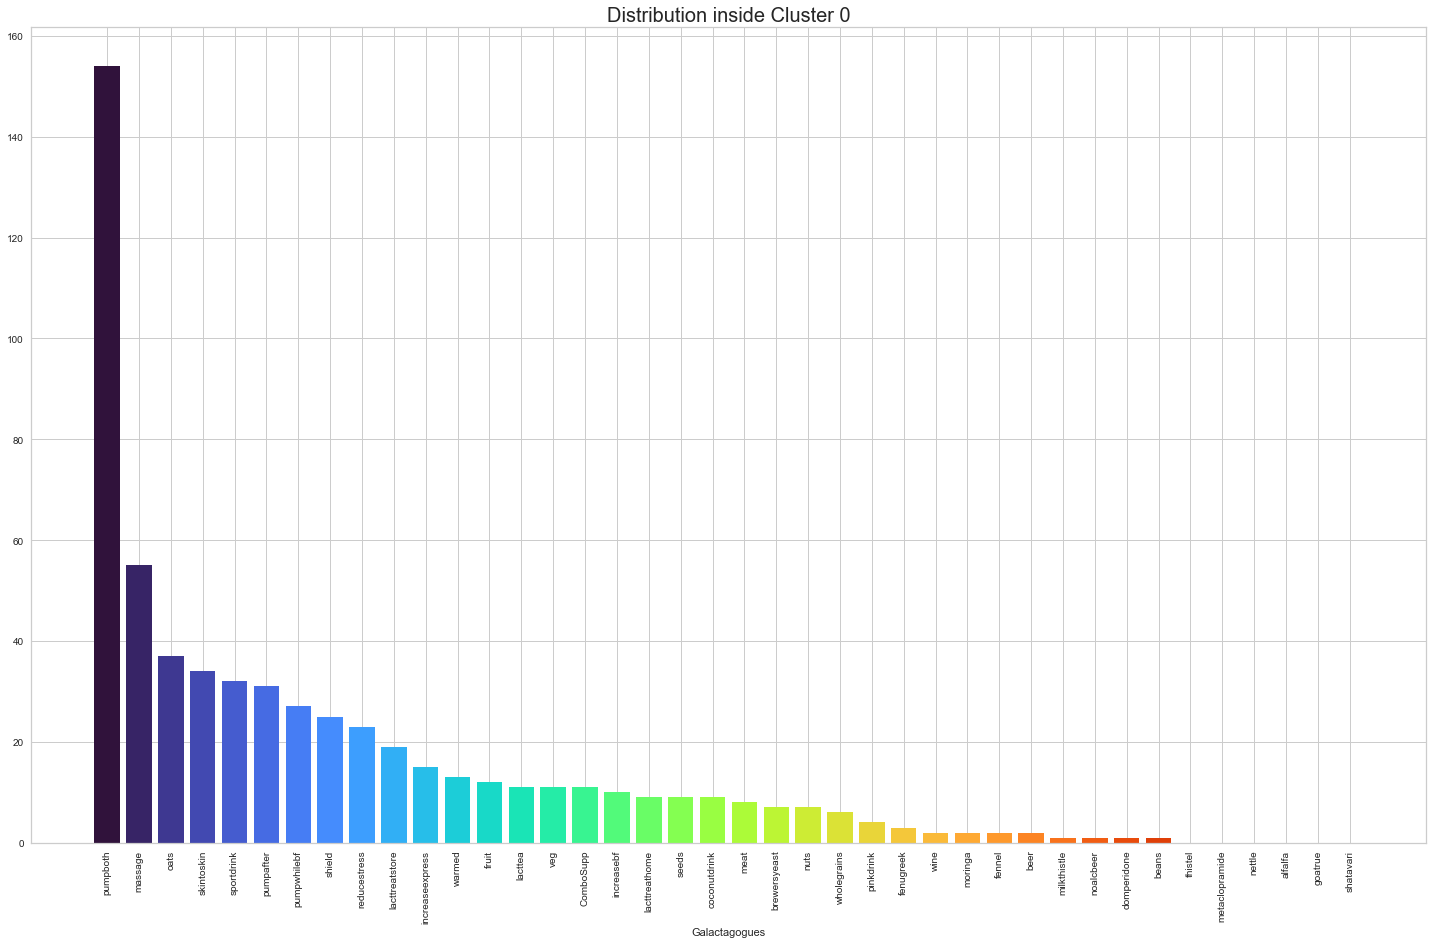

In [221]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster0['galactagogue'], cluster0['count'], color = color,data=cluster0)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 0', fontsize = 20)
plt.show()

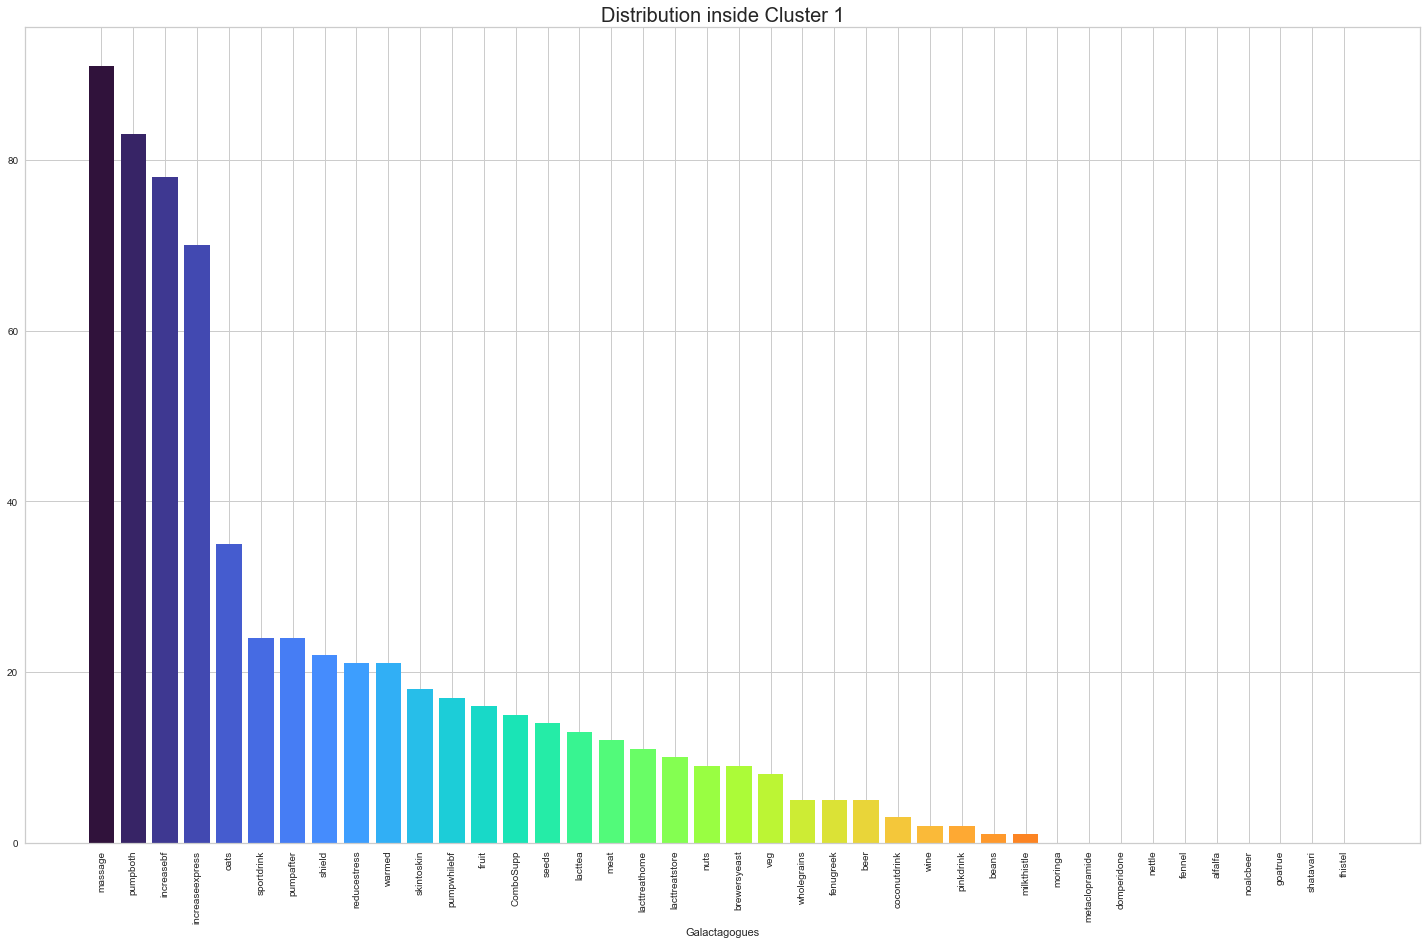

In [223]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster1['galactagogue'], cluster1['count'], color = color,data=cluster1)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 1', fontsize = 20)
plt.show()

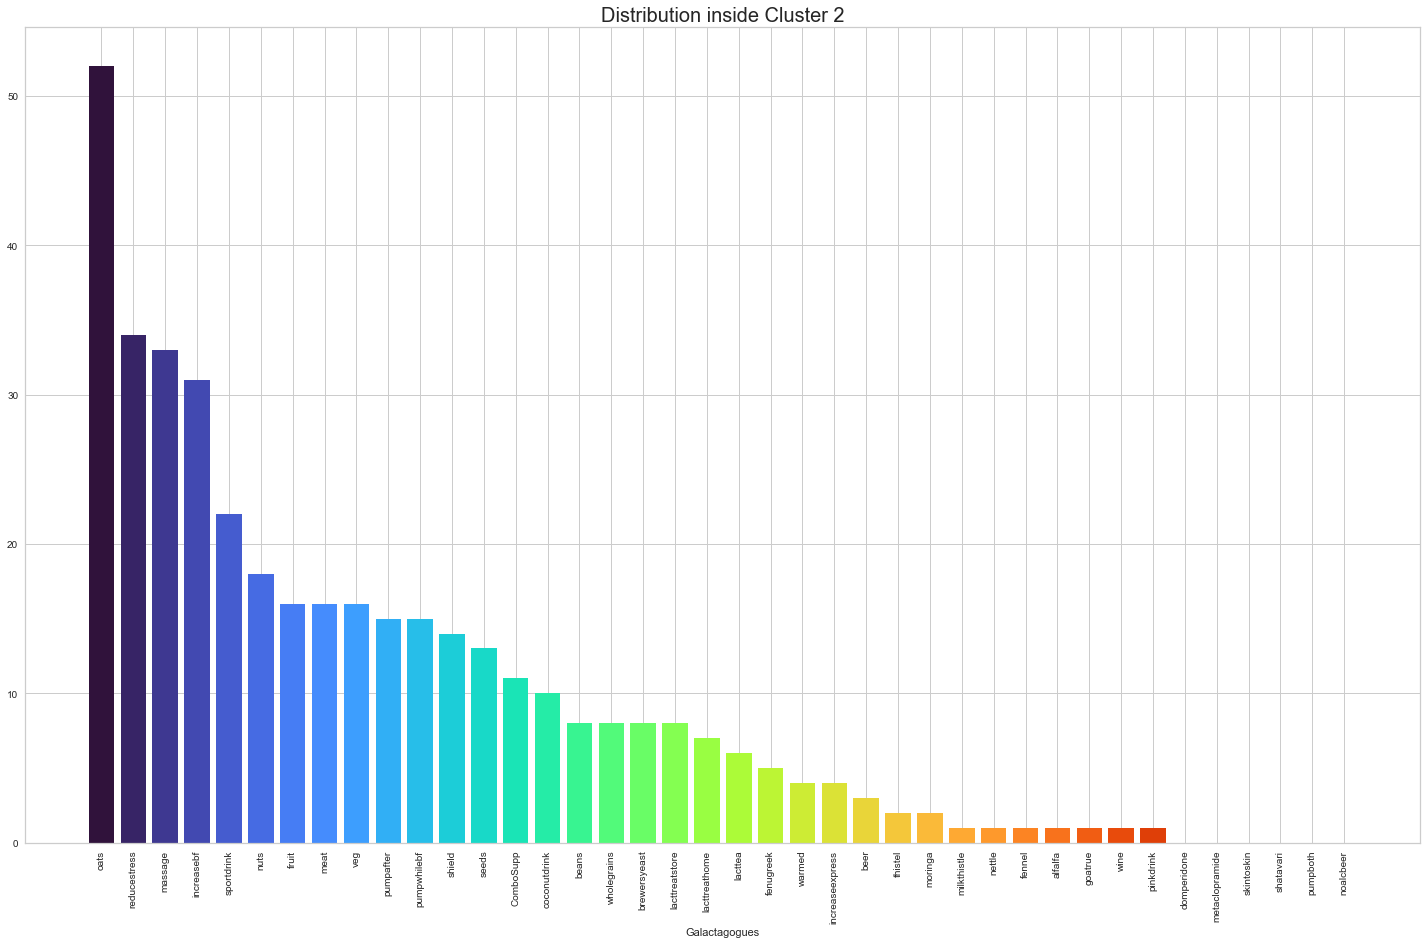

In [224]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster2['galactagogue'], cluster2['count'], color = color,data=cluster2)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 2', fontsize = 20)
plt.show()

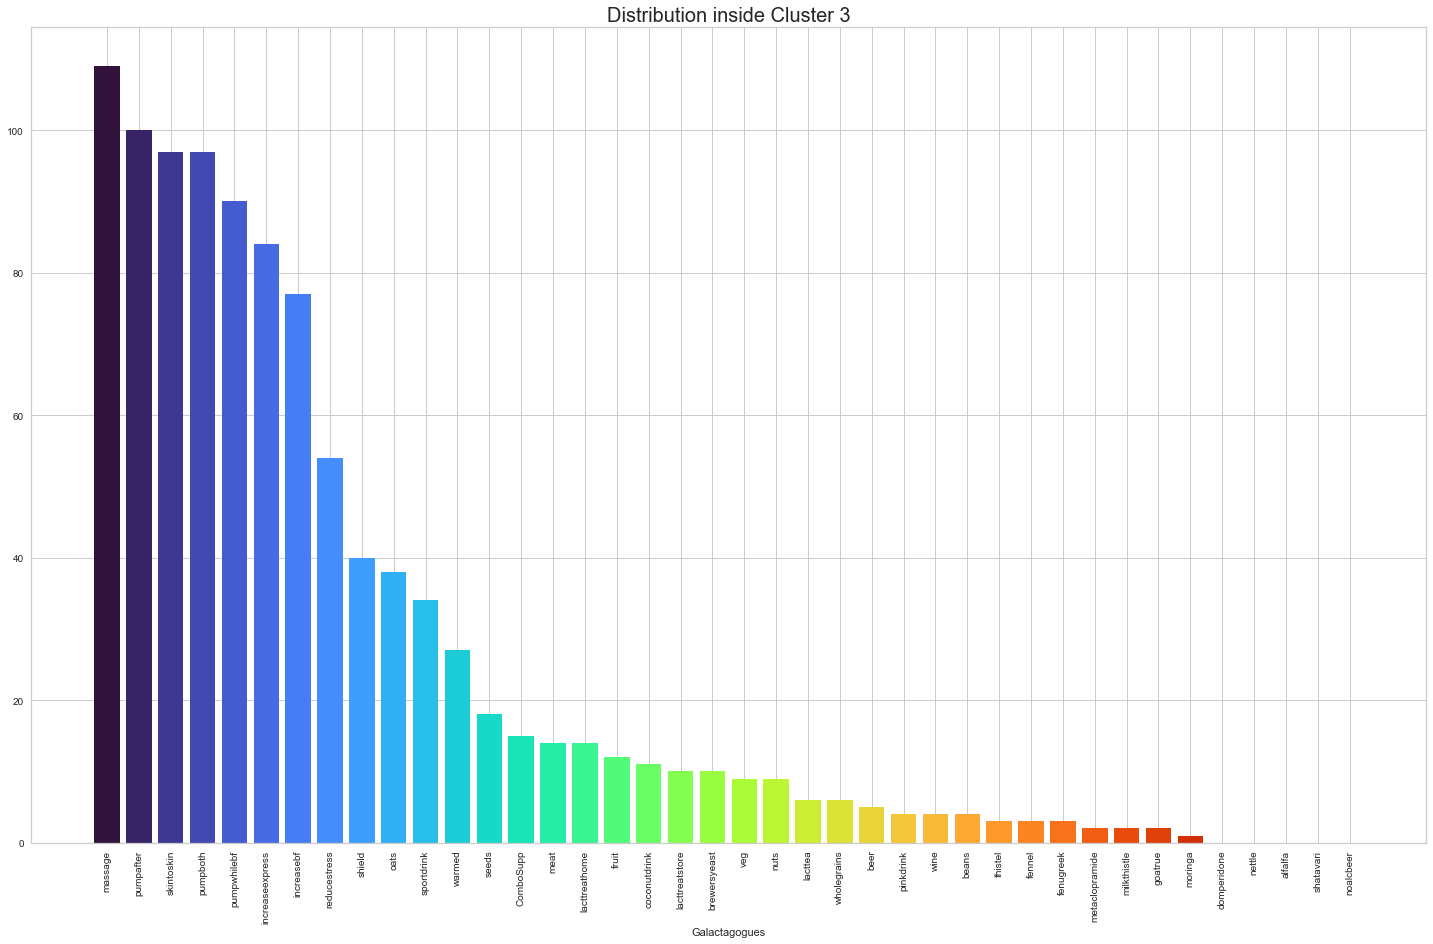

In [225]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster3['galactagogue'], cluster3['count'], color = color,data=cluster3)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 3', fontsize = 20)
plt.show()

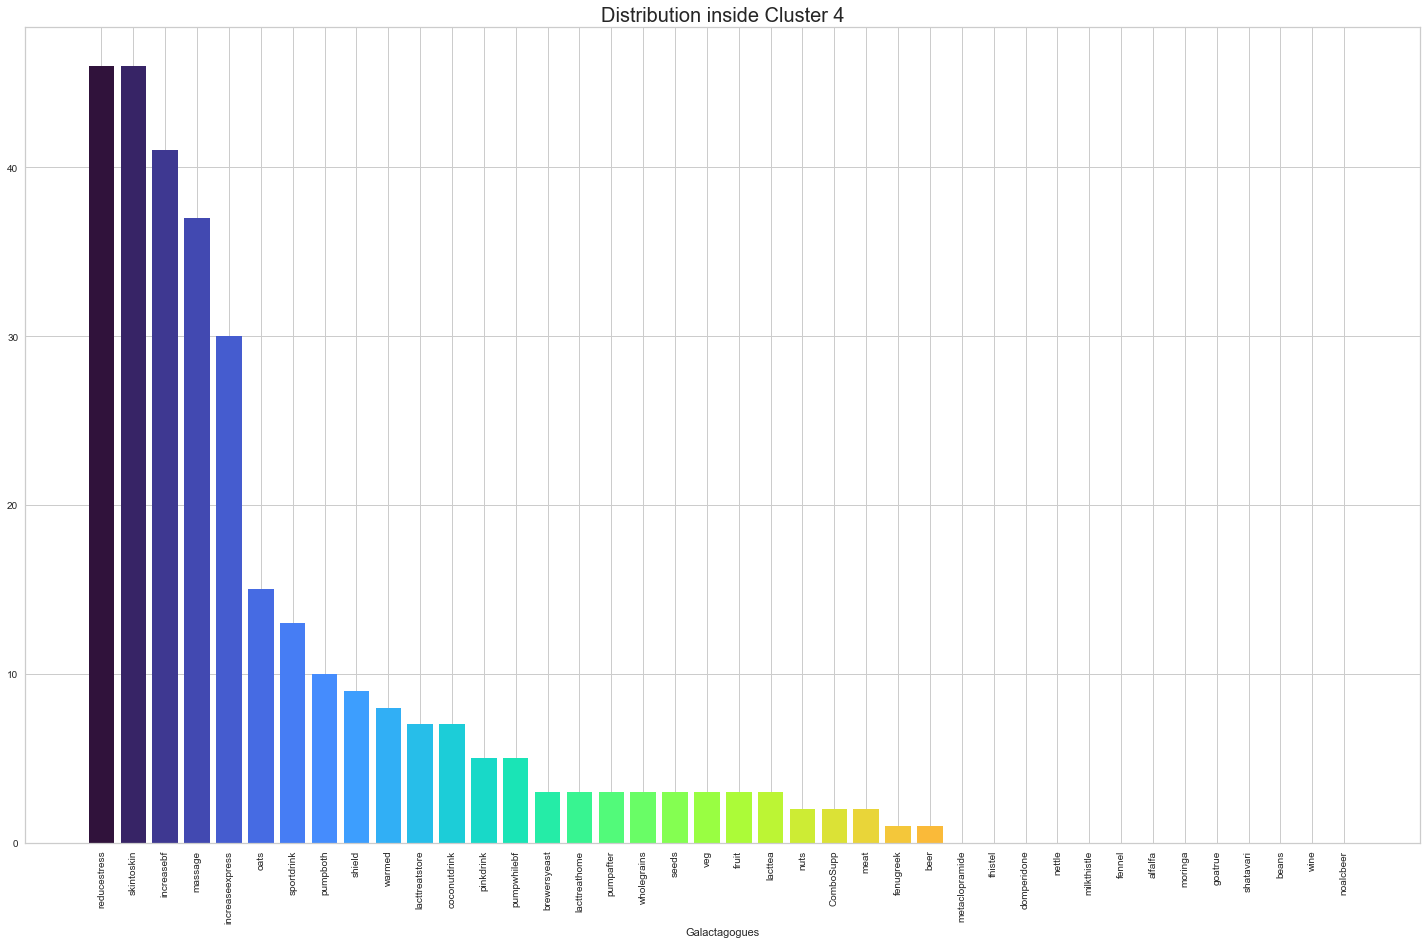

In [226]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster4['galactagogue'], cluster4['count'], color = color,data=cluster4)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 4', fontsize = 20)
plt.show()

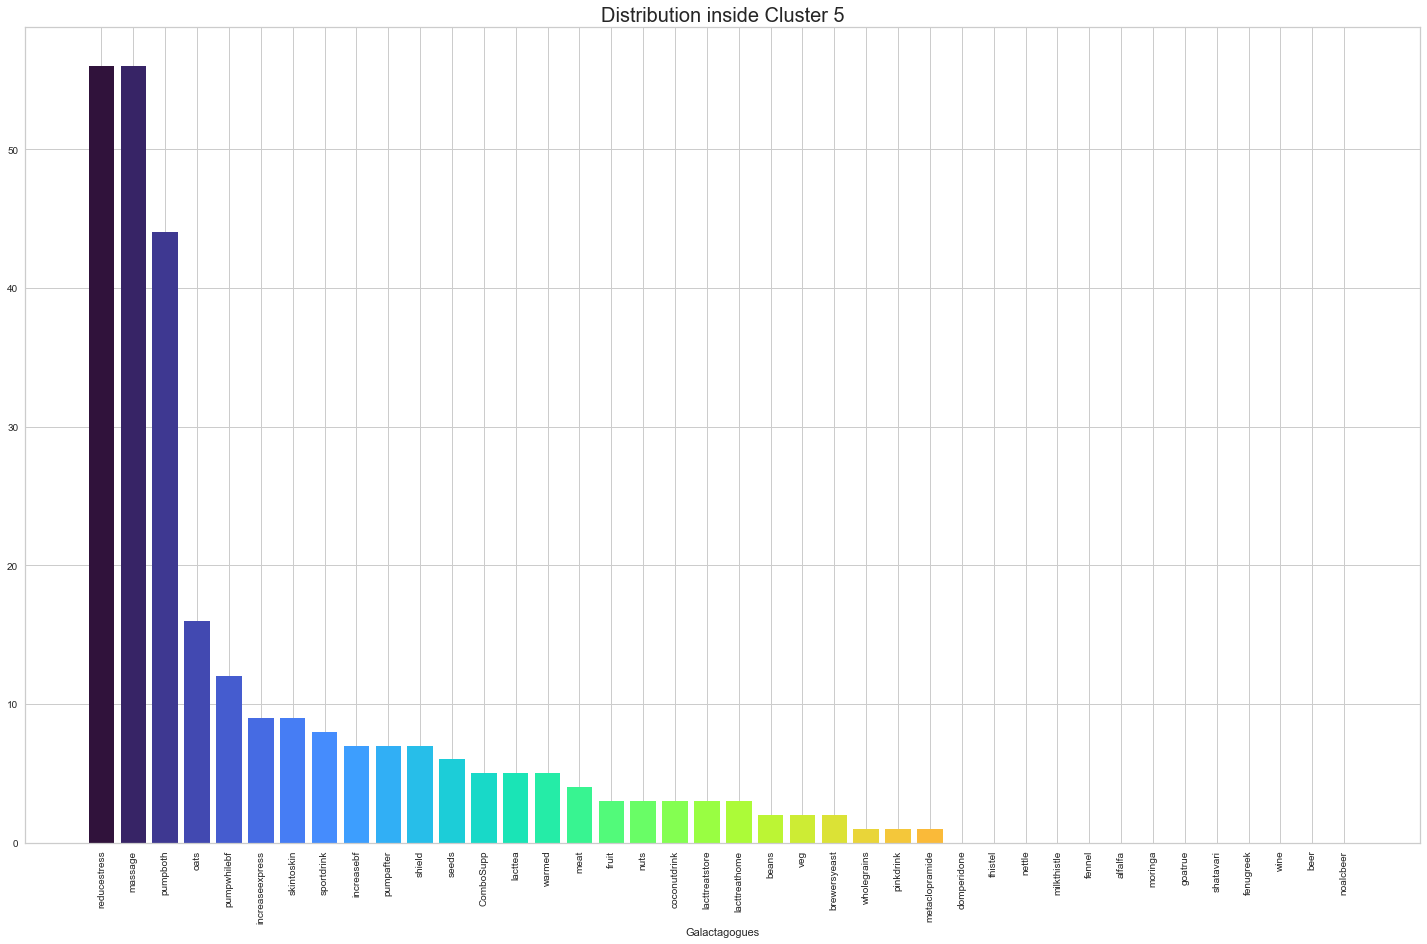

In [227]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster5['galactagogue'], cluster5['count'], color = color,data=cluster5)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 5', fontsize = 20)
plt.show()

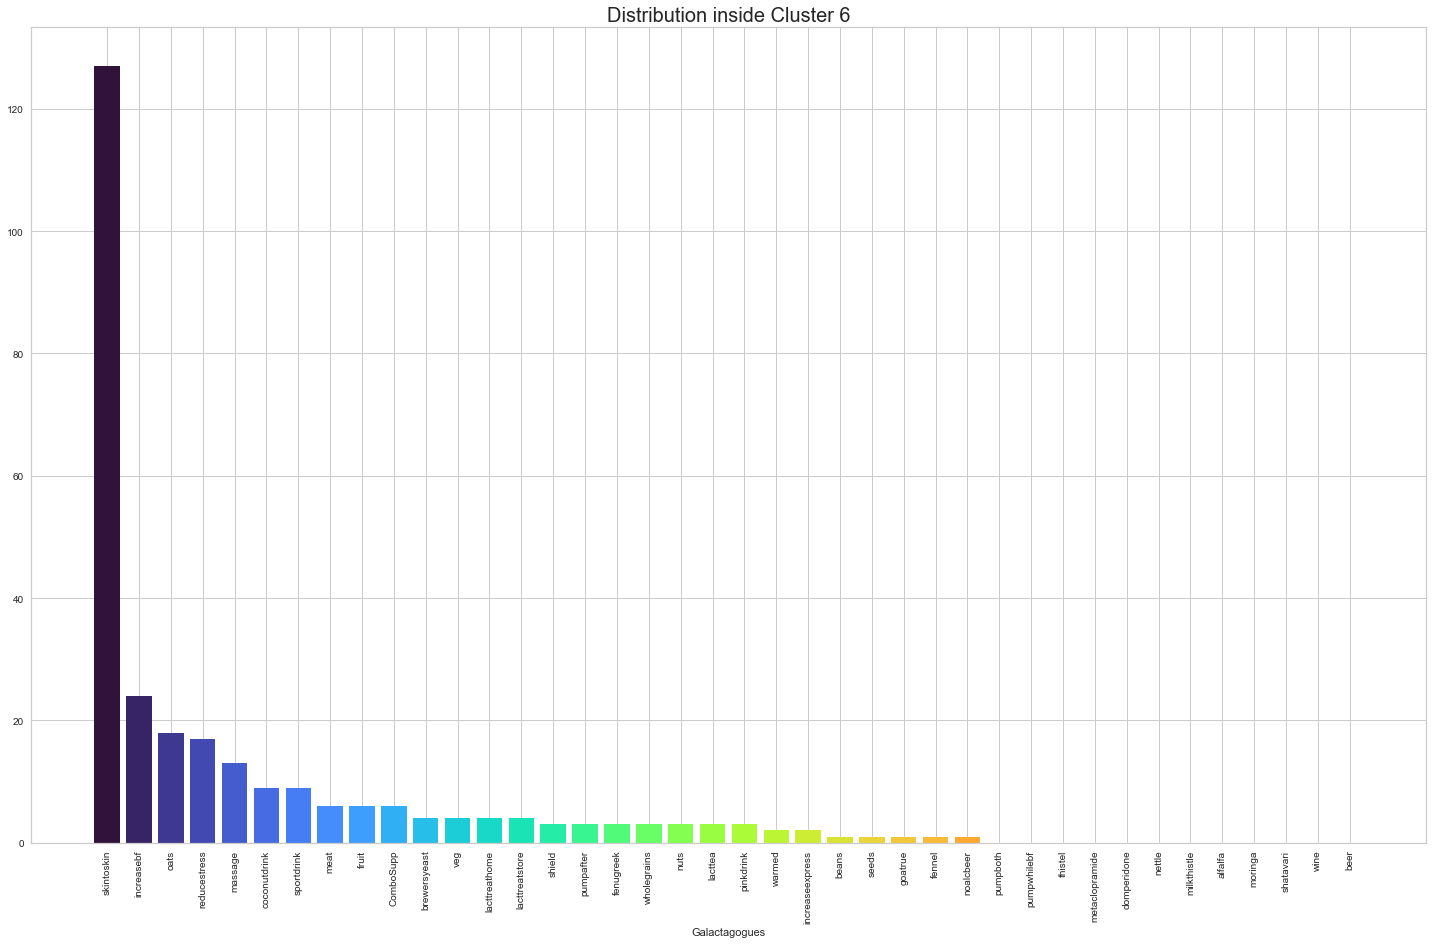

In [228]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster6['galactagogue'], cluster6['count'], color = color,data=cluster6)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 6', fontsize = 20)
plt.show()

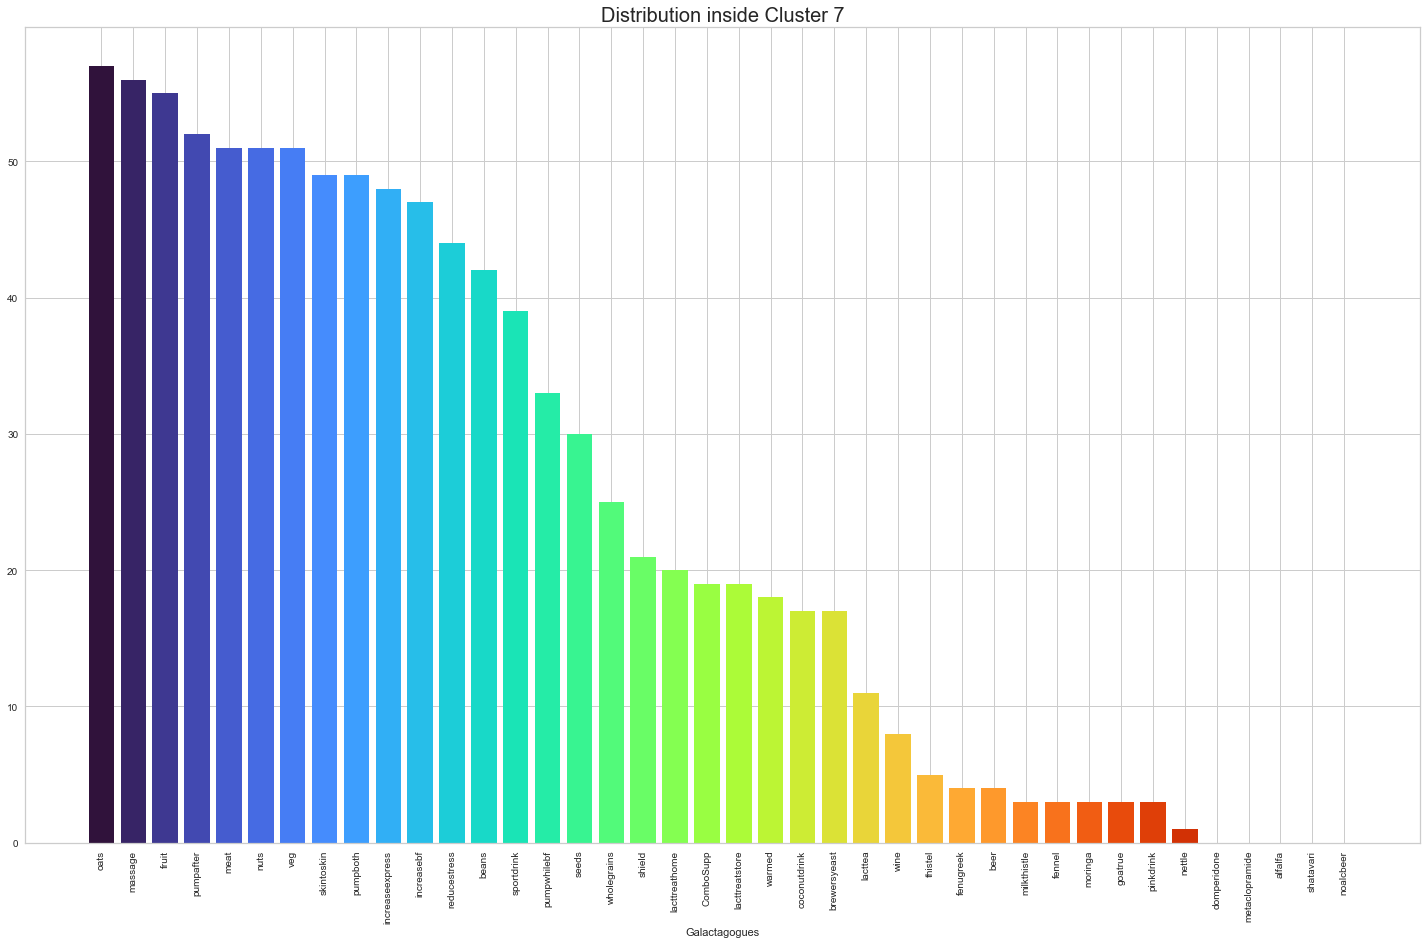

In [229]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster7['galactagogue'], cluster7['count'], color = color,data=cluster7)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 7', fontsize = 20)
plt.show()

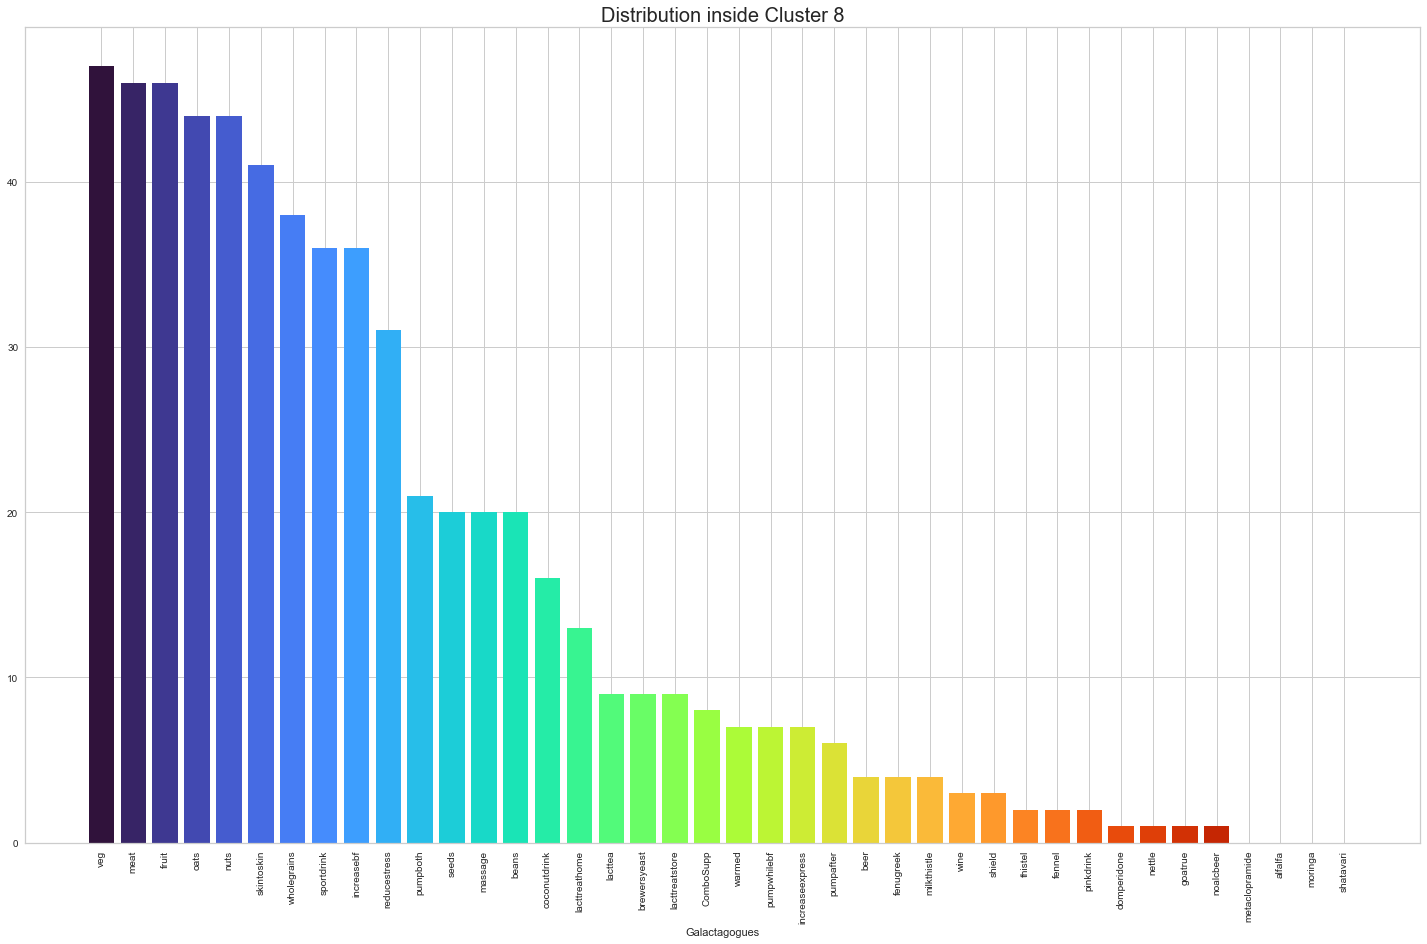

In [230]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster8['galactagogue'], cluster8['count'], color = color,data=cluster8)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 8', fontsize = 20)
plt.show()

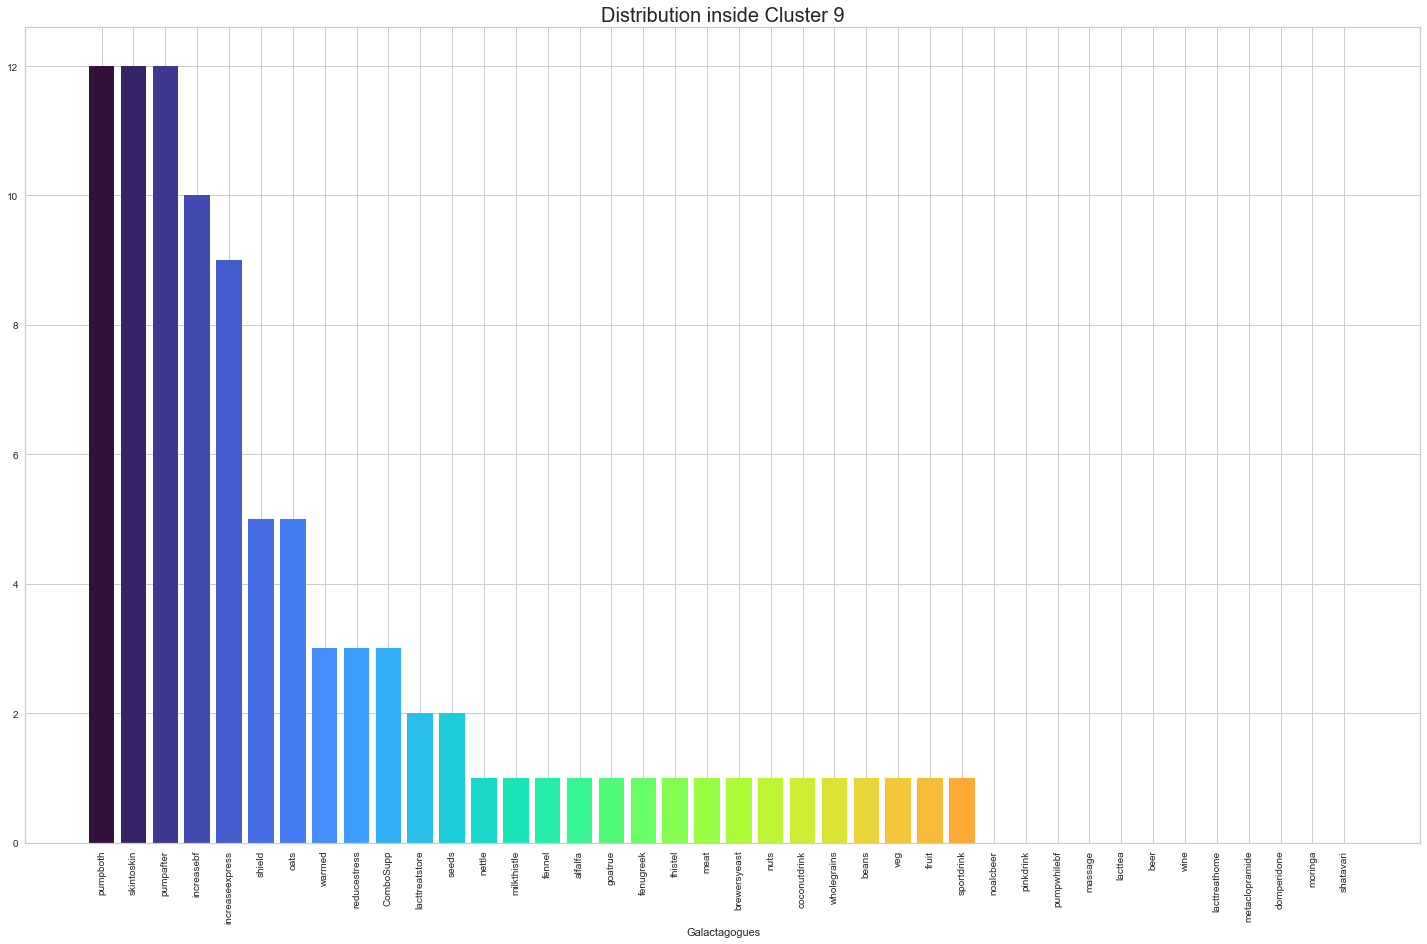

In [231]:
plt.rcParams['figure.figsize']=(25,15)
color = plt.cm.turbo(np.linspace(0, 1, 40))
plt.bar(cluster9['galactagogue'], cluster9['count'], color = color,data=cluster9)
plt.xticks(rotation = 90 )
plt.xlabel('Galactagogues')
plt.title('Distribution inside Cluster 9', fontsize = 20)
plt.show()